CSF_volume
S.Pe.C.inter._left NC>HT>HO !
0.237624389758 0.268237410403 0.276185179236

S.Call._left NC>HT>HO !
0.0500414228391 0.0600376860375 0.0628629841655

S.T.i.ant._left NC>HT>HO !
0.112073979138 0.129732186638 0.144480066036

S.Olf._left NC>HT>HO !
0.257453824736 0.280198563998 0.29201568958

S.s.P._left NC>HT>HO !
0.0367542094208 0.0471703303736 0.0479879553615

S.C.sylvian._left H0>HT>NC !
0.12195973504 0.108421125345 0.104140729161

S.F.inter._left H0>HT>NC !
0.17836868507 0.174767624171 0.161771855695

OCCIPITAL_left NC>HT>HO !
0.0791600410354 0.0829696487415 0.0834068609798

S.Li.post._left NC>HT>HO !
0.052300598646 0.0682187539575 0.0685050083044

S.Rh._left H0>HT>NC !
0.213187757379 0.200803261413 0.192269409442

F.C.L.r.sc.post._left NC>HT>HO !
0.0553803884684 0.0579582882421 0.0609380835735

S.GSM._left H0>HT>NC !
0.163538520717 0.16119414399 0.152238769631

F.C.L.p._left NC>HT>HO !
0.317117100448 0.355217608068 0.355288205933

S.F.marginal._left H0>HT>NC !
0.1595159523

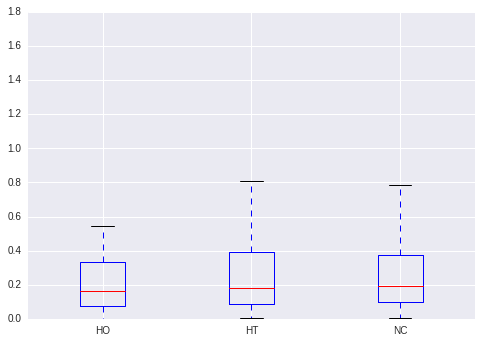

S.Call._left


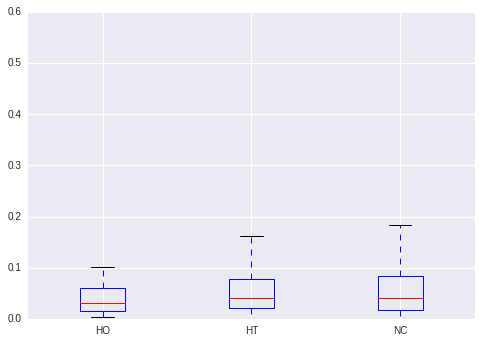

ventricle_left


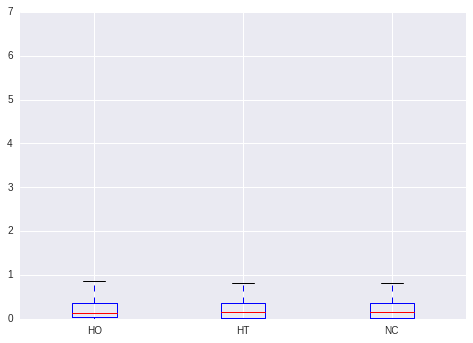

F.C.L.r.retroC.tr._left


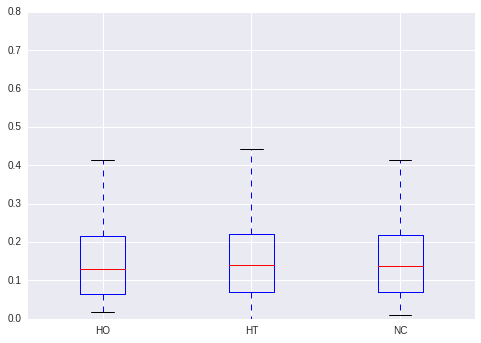

S.T.i.ant._left


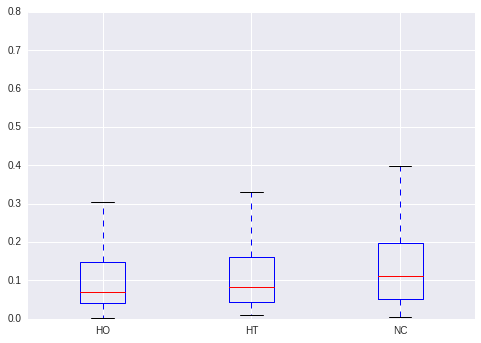

F.C.L.r.ant._left


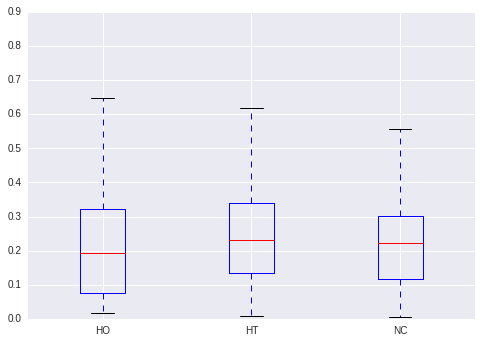

S.Olf._left


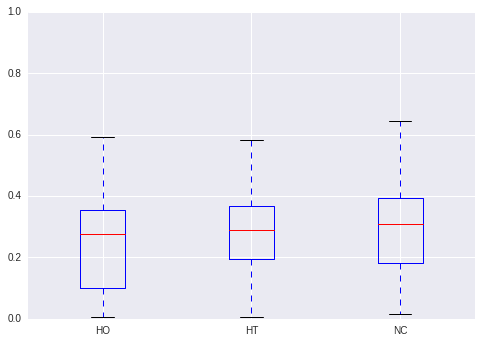

S.s.P._left


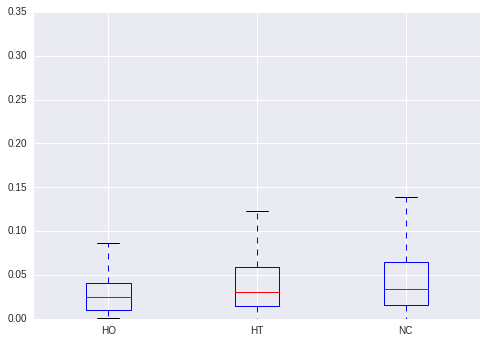

S.C.sylvian._left


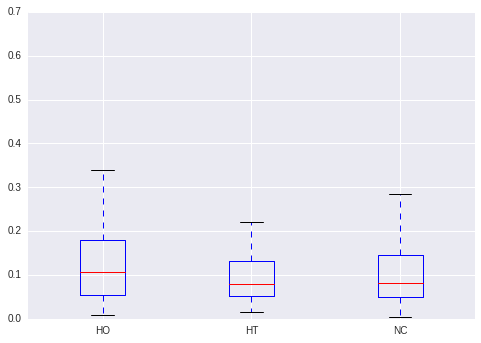

F.C.L.a._left


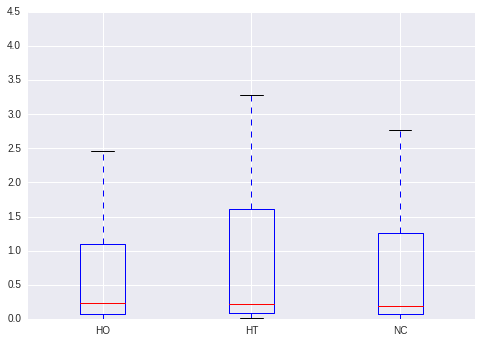

S.F.inter._left


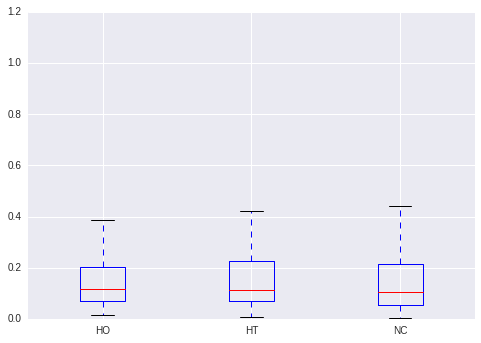

S.F.inf._left


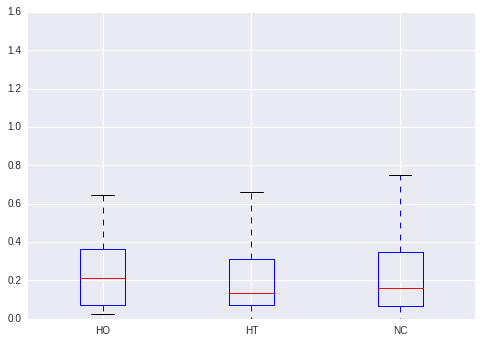

OCCIPITAL_left


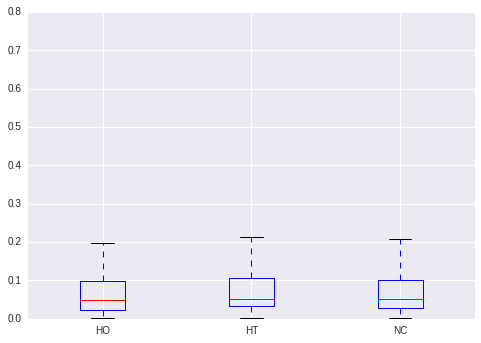

S.Li.post._left


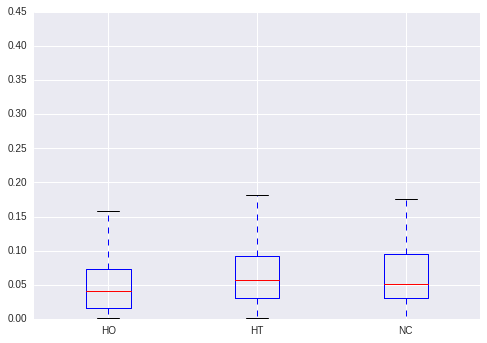

S.O.T.lat.med._left


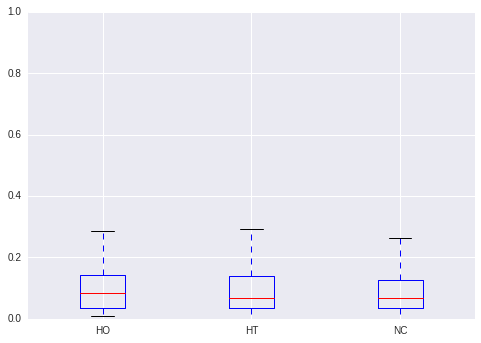

S.T.i.post._left


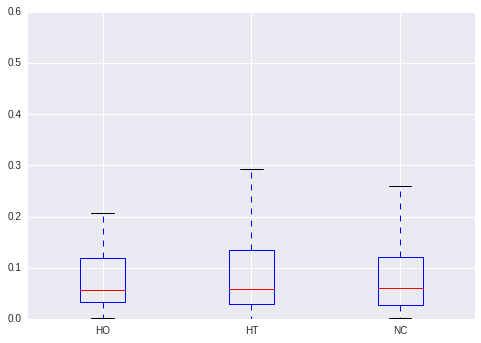

F.C.L.r.diag._left


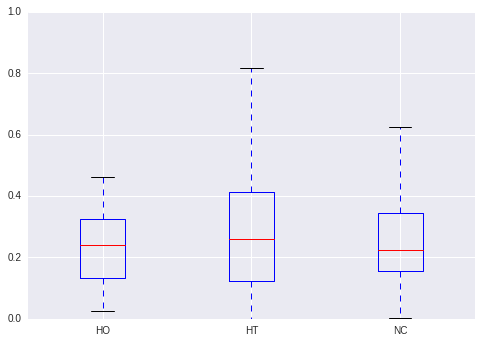

S.Pa.sup._left


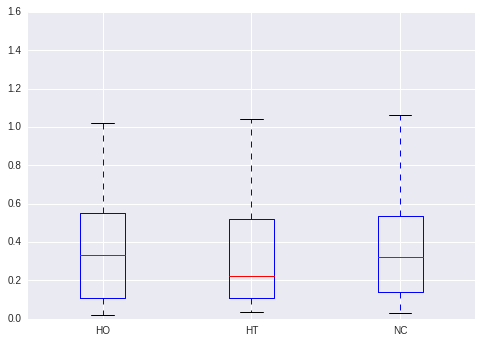

S.Rh._left


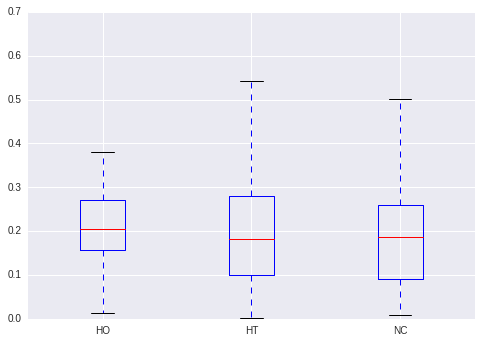

F.C.L.r.sc.post._left


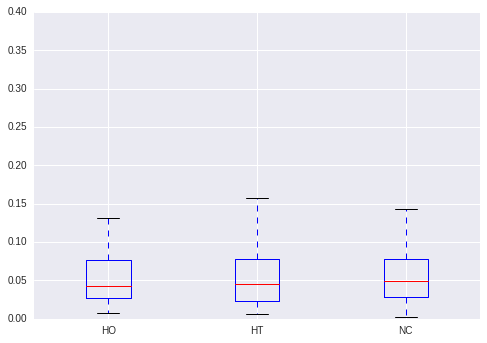

S.Pe.C.inf._left


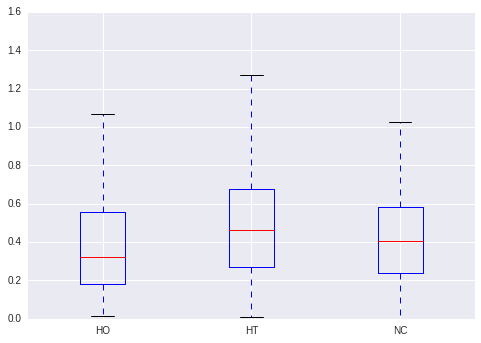

S.GSM._left


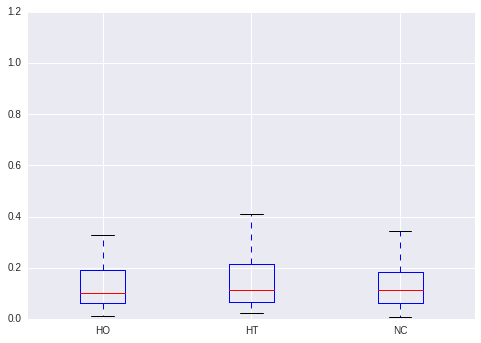

F.C.L.p._left


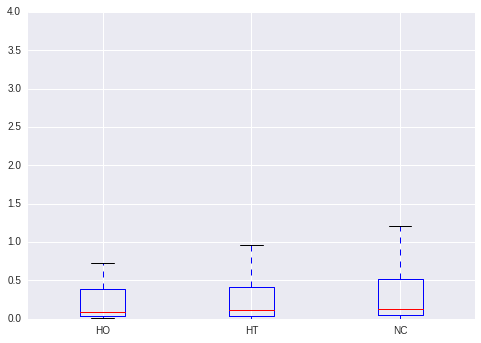

S.F.marginal._left


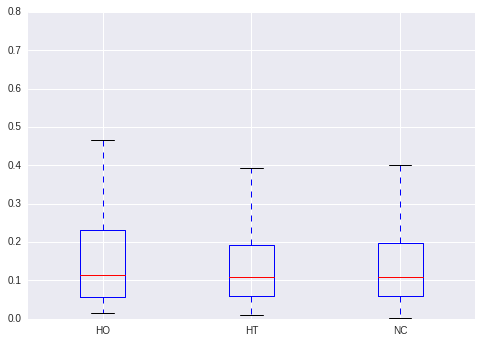

S.T.pol._left


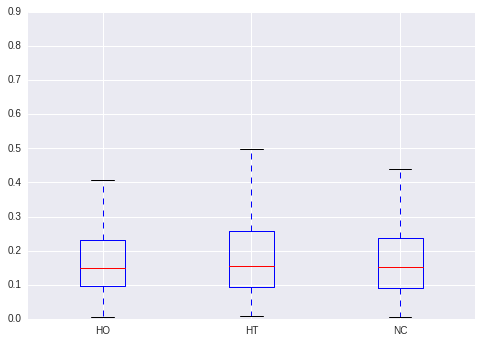

F.P.O._left


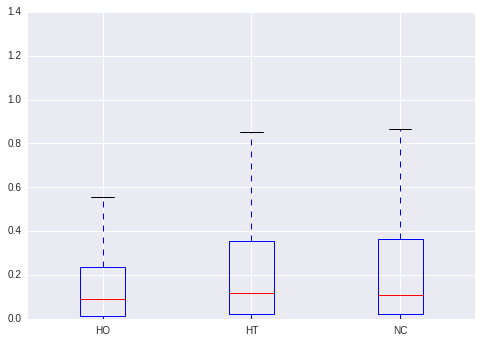

S.Pa.int._left


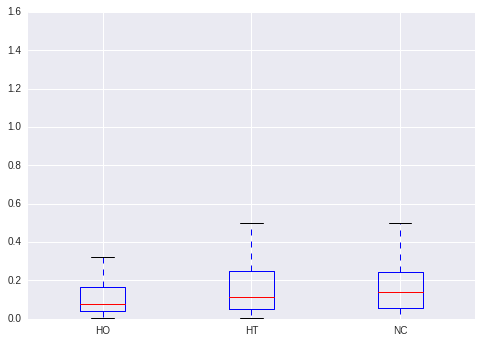

F.Coll._left


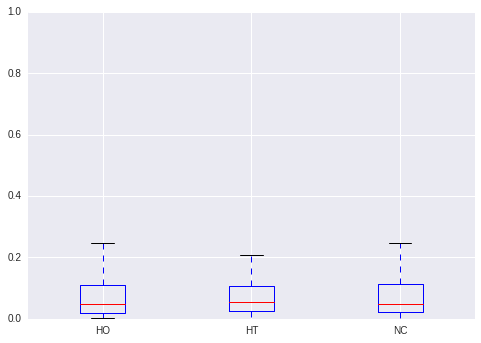

S.Pa.t._left


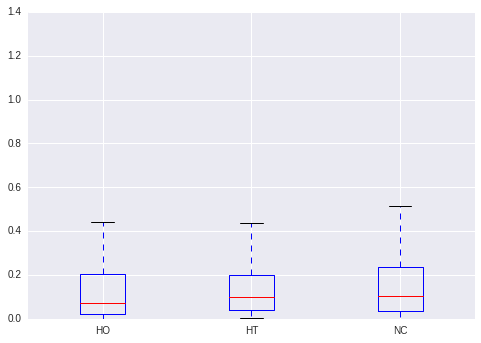

S.O.T.lat.ant._left


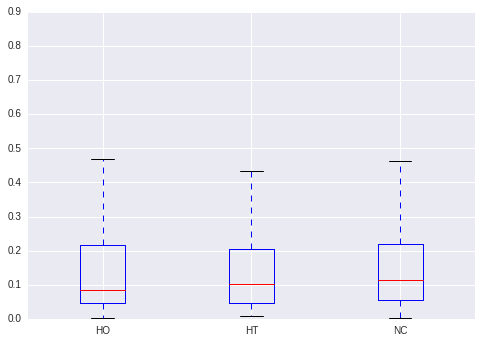

S.F.polaire.tr._left


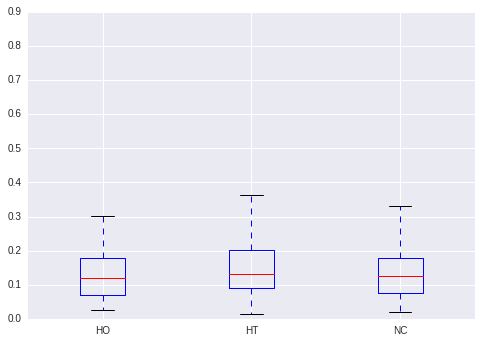

F.I.P._left


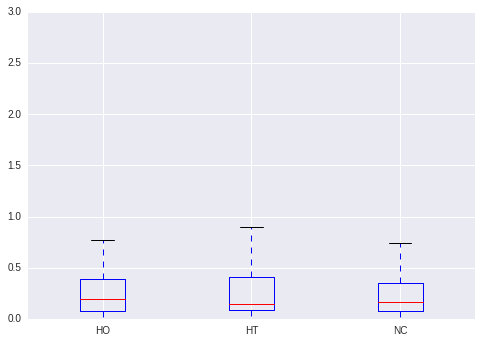

S.R.inf._left


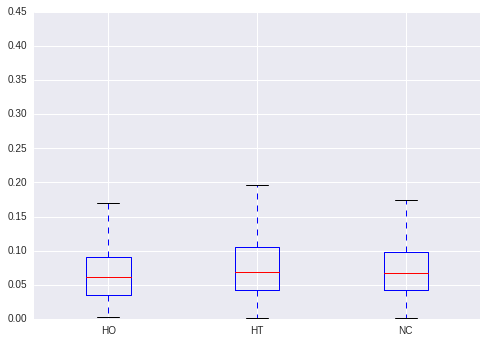

S.T.s._left


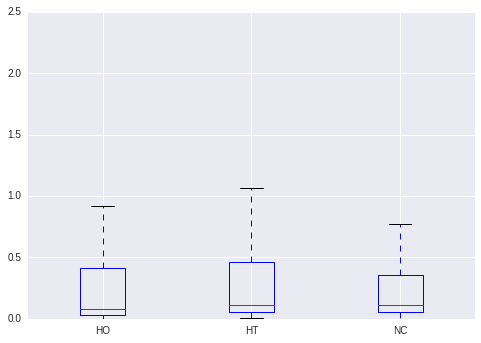

INSULA_left


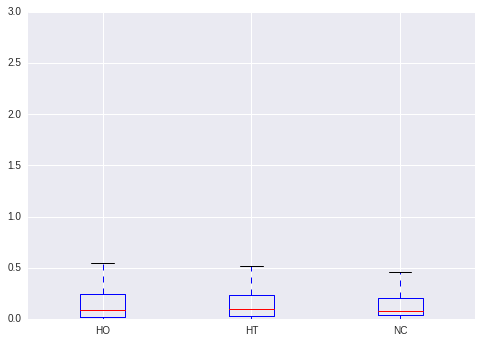

F.C.M.ant._left


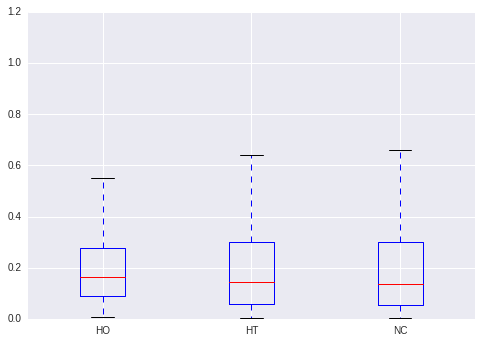

S.Or._left


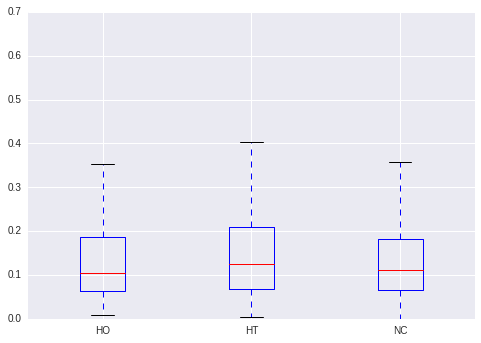

S.F.orbitaire._left


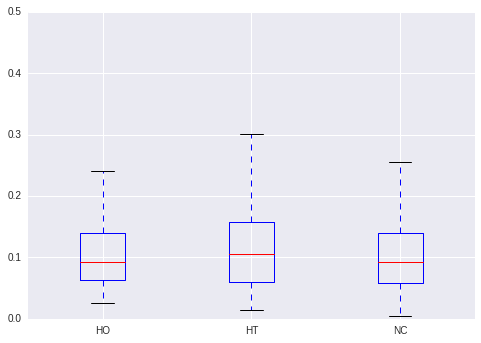

S.T.s.ter.asc.ant._left


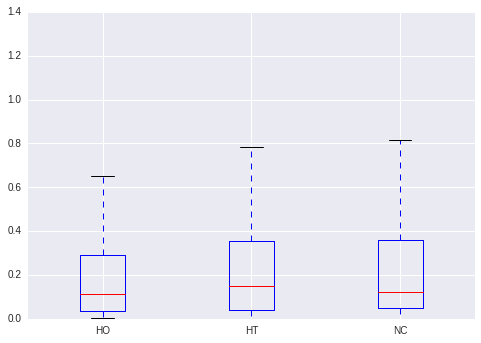

F.Cal.ant.-Sc.Cal._left


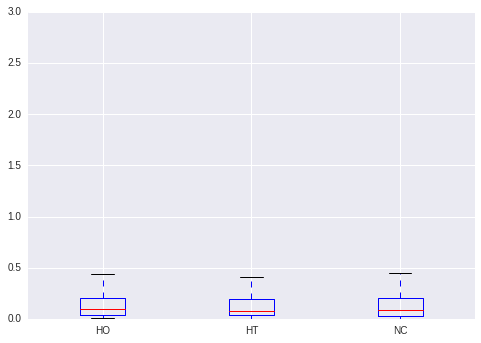

S.C.LPC._left


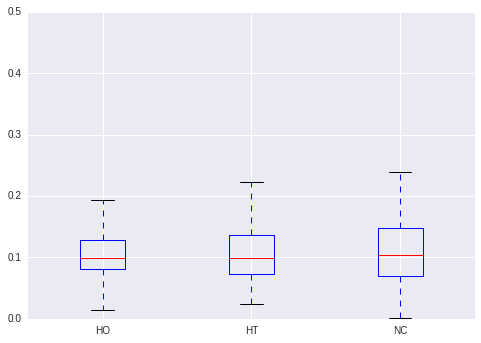

S.Li.ant._left


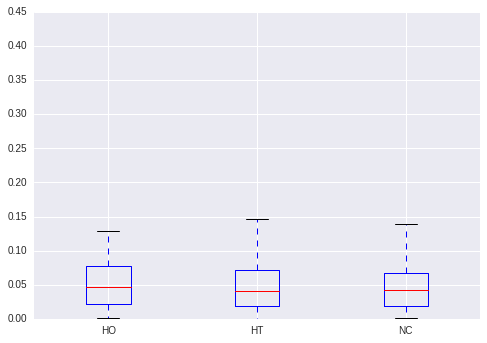

F.I.P.r.int.1_left


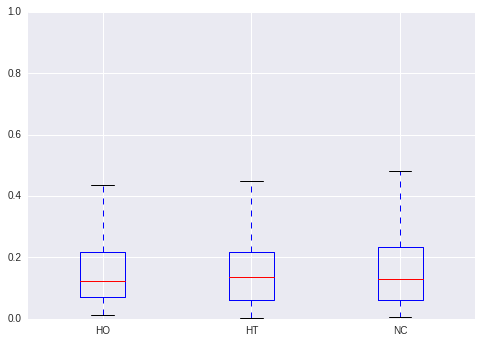

S.F.inf.ant._left


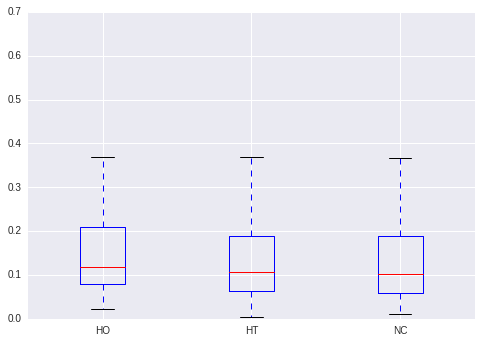

S.F.int._left


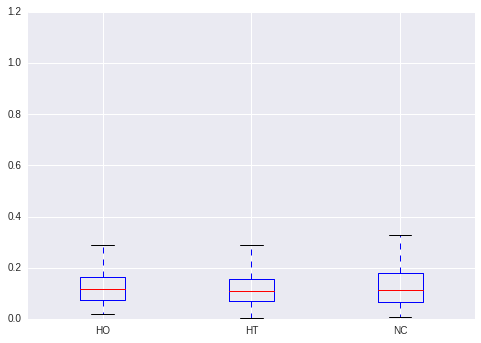

S.O.p._left


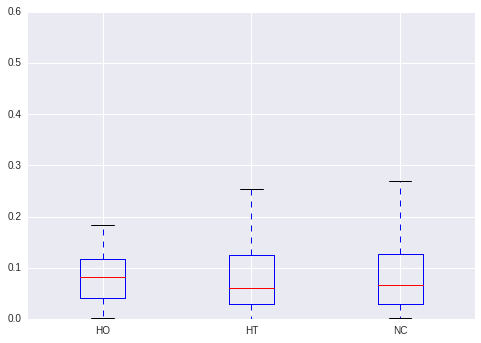

S.F.sup._left


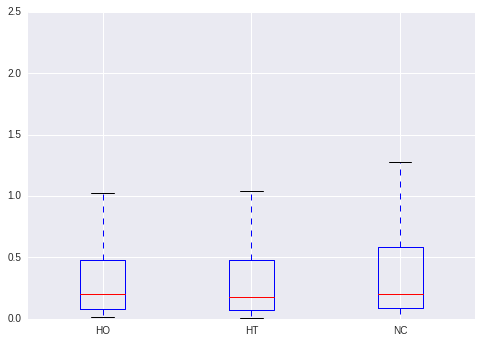

F.C.L.r.asc._left


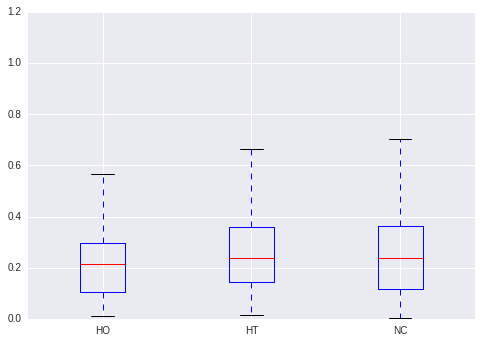

F.I.P.Po.C.inf._left


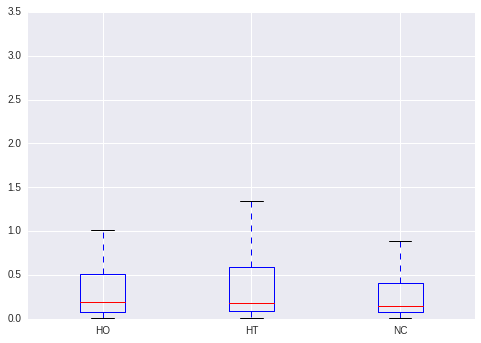

S.F.median._left


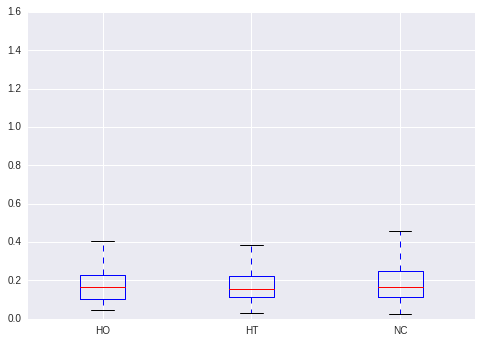

S.T.s.ter.asc.post._left


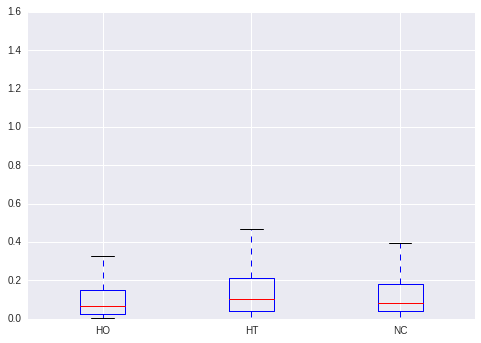

S.O.T.lat.int._left


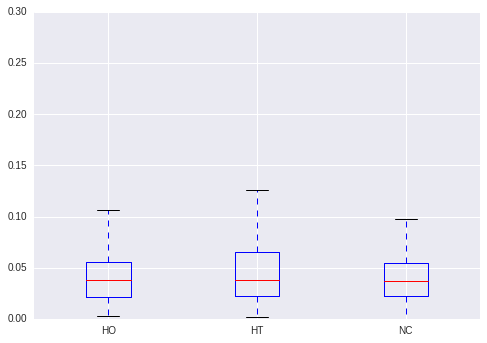

S.Pe.C.sup._left


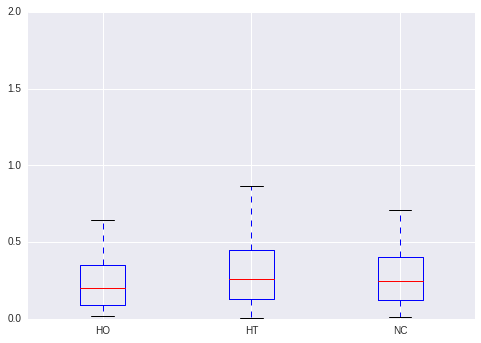

S.Po.C.sup._left


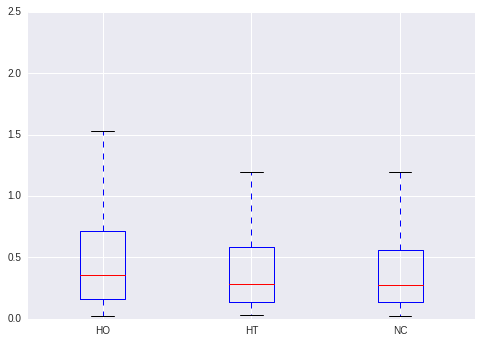

F.I.P.r.int.2_left


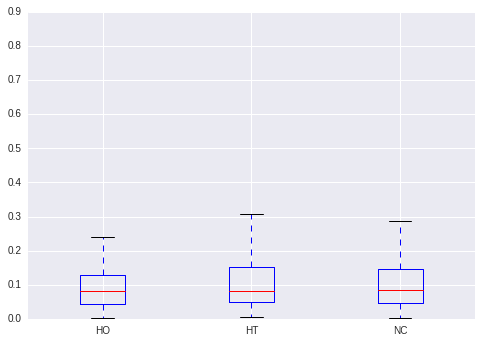

F.C.M.post._left


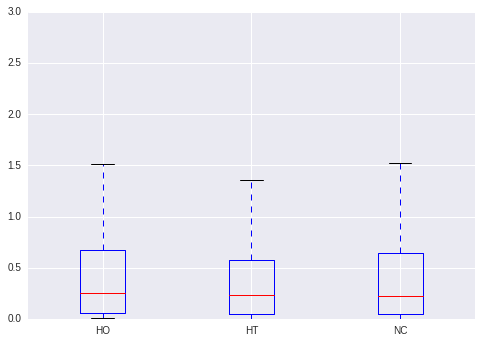

S.O.T.lat.post._left


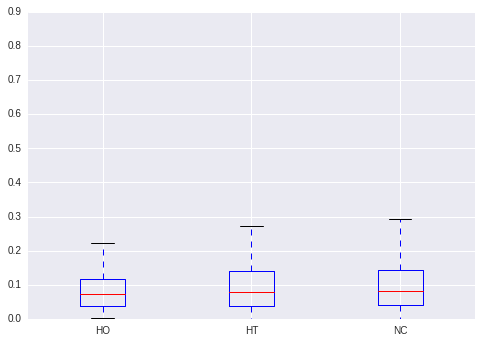

S.Cu._left


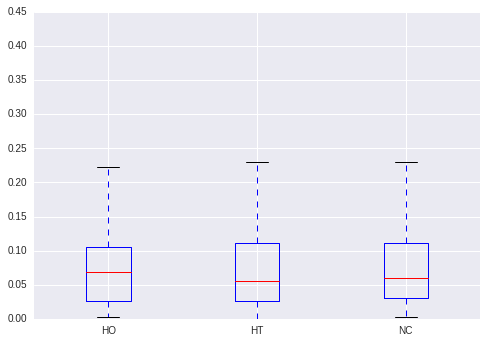

S.p.C._left


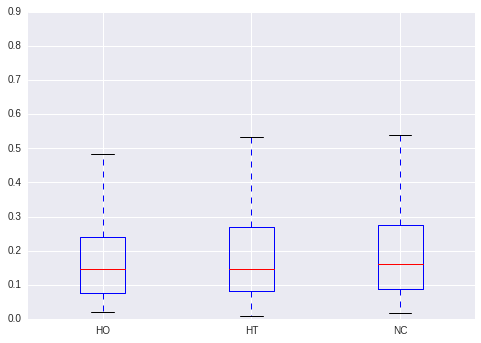

S.Pe.C.median._left


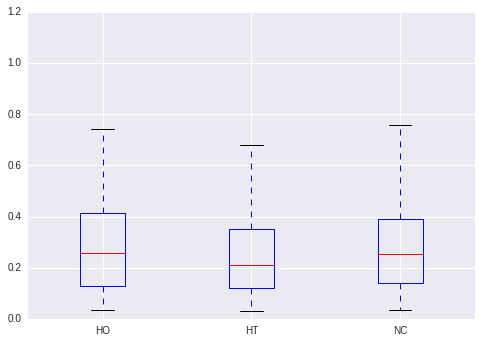

S.C._left


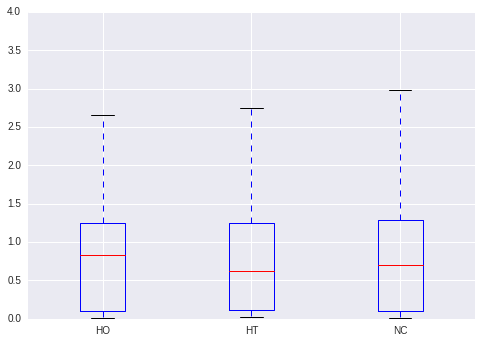

S.Pe.C.marginal._left


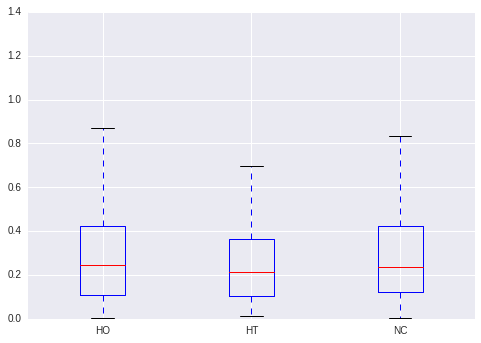

In [78]:
%run /home/grg/git/alfa/nilearn-helper.py
%run /home/grg/git/alfa/roicollect.py
from scipy import stats

labels = [e for e in json.load(open('/tmp/sulci_list.txt')) if 'left' in e]
groups_names = ['HO','HT','NC']
keys = ['label', 'thickness_mean', 'thickness_std', 'CSF_volume', 'GM_volume', 'mean_depth', 'maxdepth', 'mindepth', 'size']

key = keys[3]
print key

data = pd.read_excel('/home/grg/ALFA_sulci_left.xls')
data = data.set_index(data['subject'])
del data['subject']
tiv = json.load(open('/home/grg/spm/data/tiv.json'))
tiv = pd.DataFrame(tiv.items(), index=[string.atoi(e) for e in tiv.keys()], columns=['subject', 'tiv'])
#del tiv['subject']
data = data.join(tiv)
data['%s_corr'%key] = data[key] / data['tiv']

for label in labels[:]:
    df = data[data['label']==label]
    groups = get_groups(df, groups_names)
    box = [e['%s_corr'%key].tolist() for e in groups]
    #print stats.shapiro(box[0])[1], stats.shapiro(box[1])[1], stats.shapiro(box[2])[1]
    
    if np.mean(box[0]) > np.mean(box[1]) and np.mean(box[1]) > np.mean(box[2]):
        print label, 'H0>HT>NC !'
        print np.mean(box[0]), np.mean(box[1]), np.mean(box[2])
        print ''
    if np.mean(box[2]) > np.mean(box[1]) and np.mean(box[1]) > np.mean(box[0]):
        print label, 'NC>HT>HO !'
        print np.mean(box[0]), np.mean(box[1]), np.mean(box[2])
        print ''
    
for label in labels[:]:
    df = data[data['label']==label]
    groups = get_groups(df, groups_names)
    box = [e['%s_corr'%key].tolist() for e in groups]
    print label
    
    plt.boxplot(box, labels=groups_names)
    plt.show()

S.Pe.C.inter._left
[[ 1.          0.00552834]
 [ 0.00552834  1.        ]]


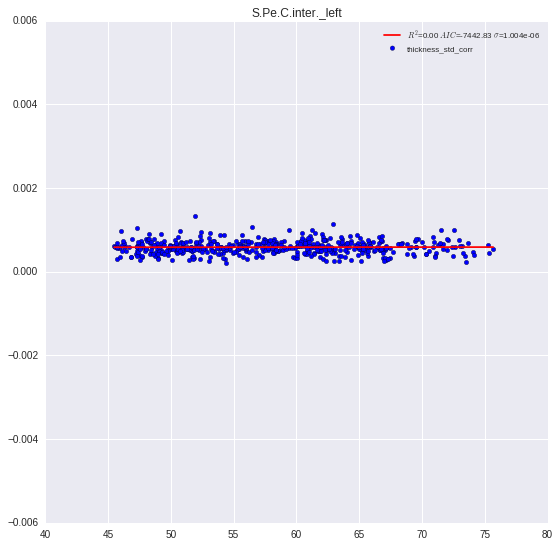

S.Call._left
[[ 1.         -0.07088865]
 [-0.07088865  1.        ]]


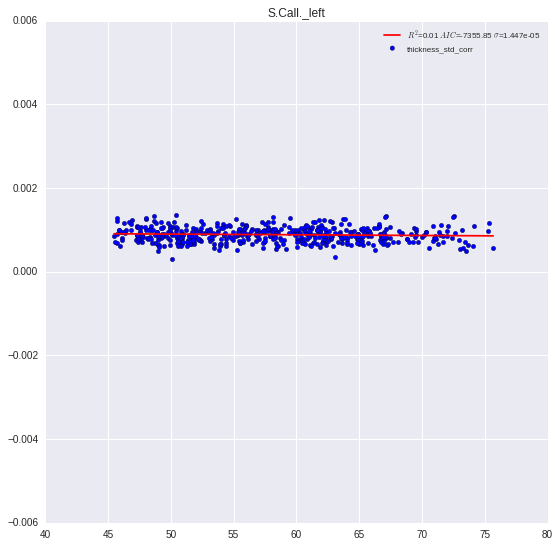

ventricle_left
[[ 1.         -0.20418426]
 [-0.20418426  1.        ]]


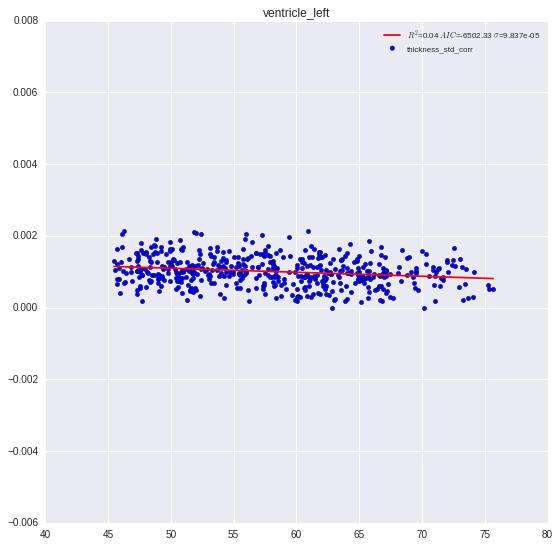

F.C.L.r.retroC.tr._left
[[ 1.         -0.09871438]
 [-0.09871438  1.        ]]


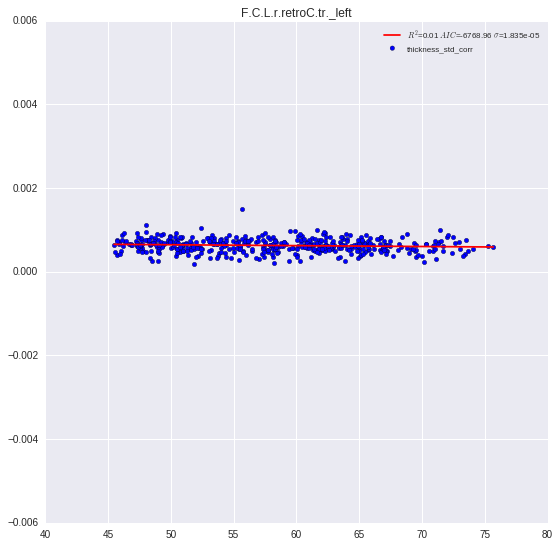

S.T.i.ant._left
[[ 1.         -0.11483588]
 [-0.11483588  1.        ]]


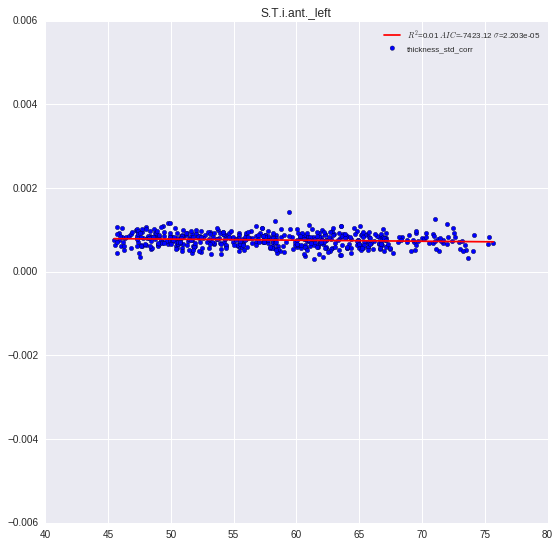

F.C.L.r.ant._left
[[ 1.         -0.12750889]
 [-0.12750889  1.        ]]


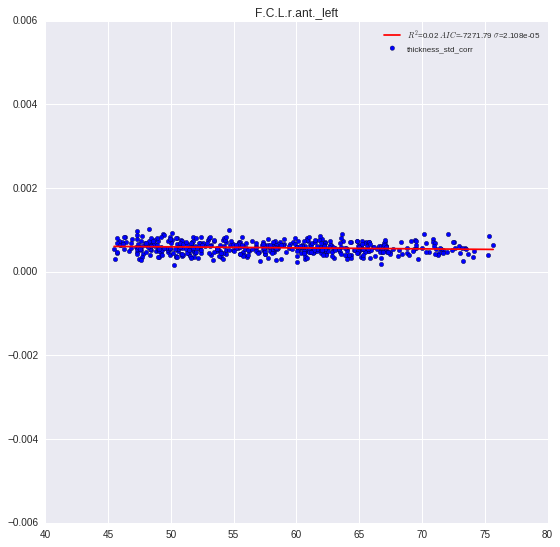

S.Olf._left
[[ 1.         -0.11702096]
 [-0.11702096  1.        ]]


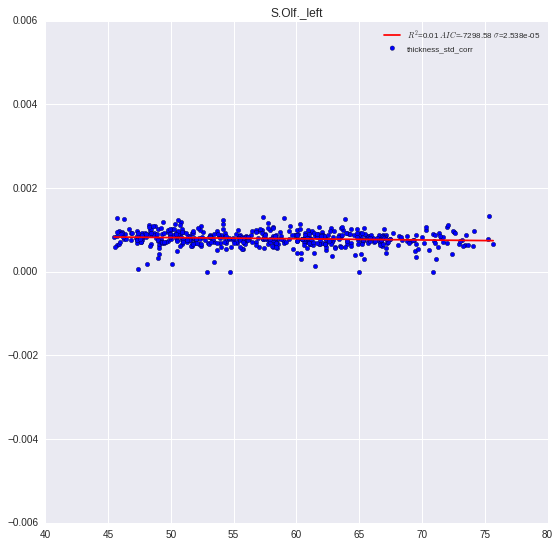

S.s.P._left
[[ 1.        -0.1172971]
 [-0.1172971  1.       ]]


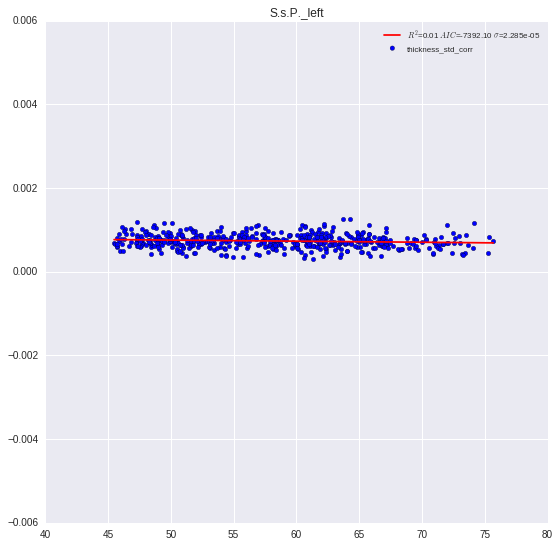

S.C.sylvian._left
[[  1.00000000e+00  -2.51964828e-04]
 [ -2.51964828e-04   1.00000000e+00]]


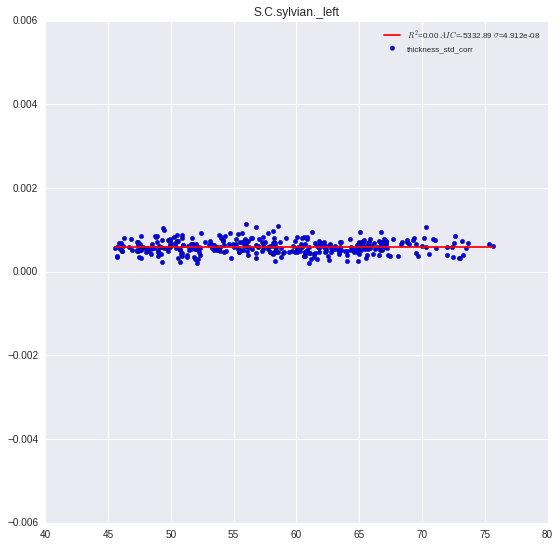

F.C.L.a._left
[[ 1.         -0.01938914]
 [-0.01938914  1.        ]]


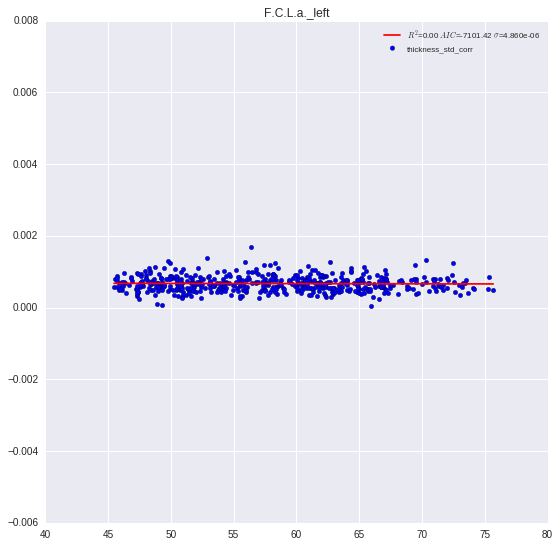

S.F.inter._left
[[ 1.         -0.09586102]
 [-0.09586102  1.        ]]


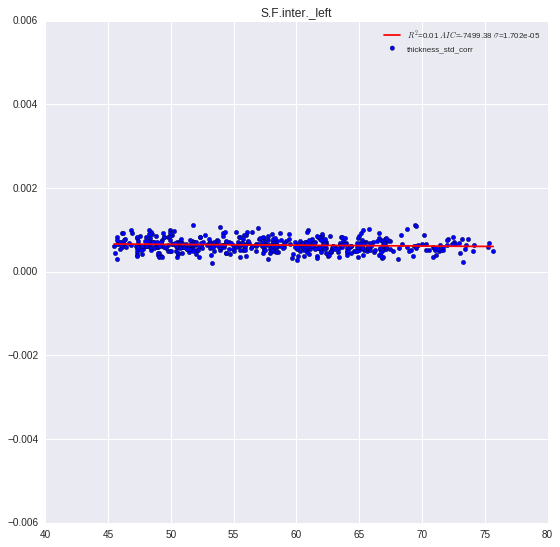

S.F.inf._left
[[ 1.        -0.0746582]
 [-0.0746582  1.       ]]


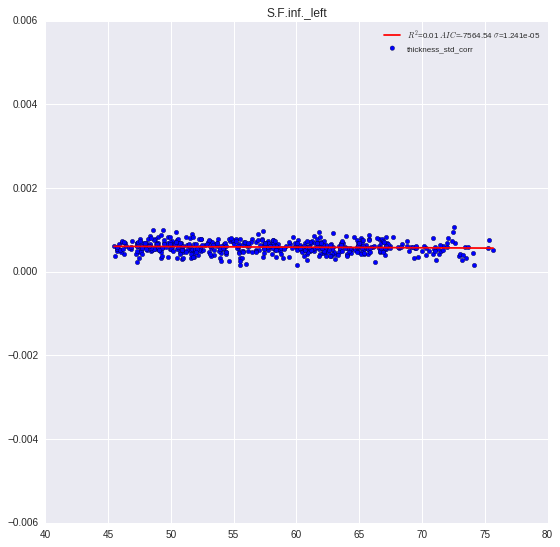

OCCIPITAL_left
[[ 1.          0.04052458]
 [ 0.04052458  1.        ]]


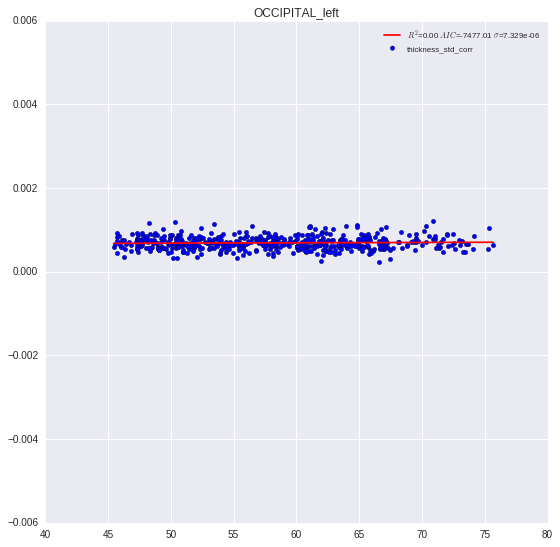

S.Li.post._left
[[ 1.         -0.02335137]
 [-0.02335137  1.        ]]


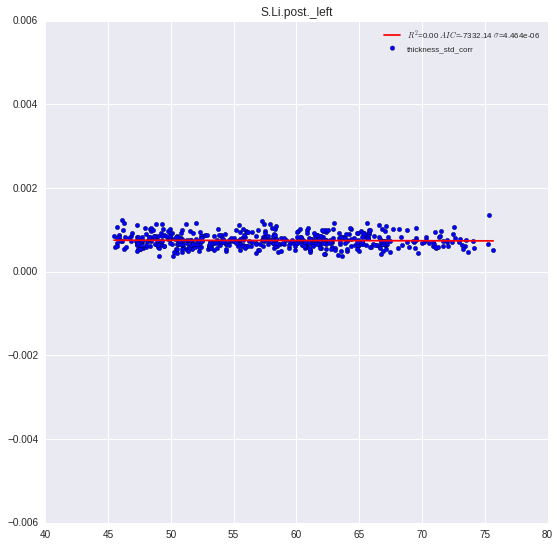

S.O.T.lat.med._left
[[ 1.         -0.03533952]
 [-0.03533952  1.        ]]


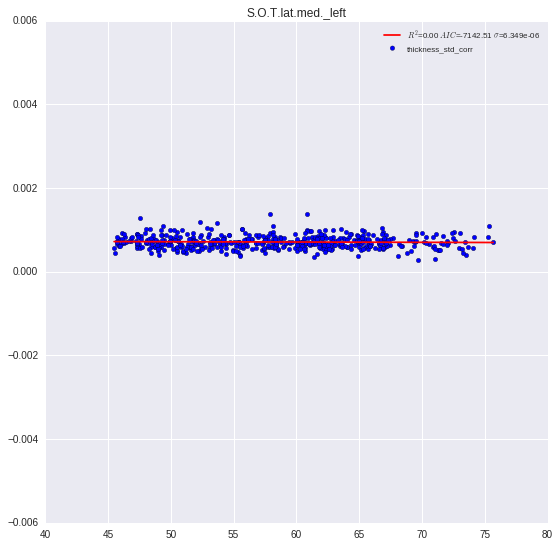

S.T.i.post._left
[[ 1.         -0.03810109]
 [-0.03810109  1.        ]]


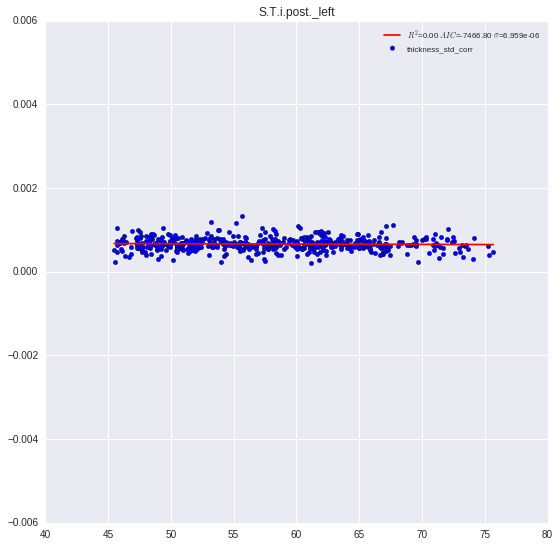

F.C.L.r.diag._left
[[ 1.         -0.14961632]
 [-0.14961632  1.        ]]


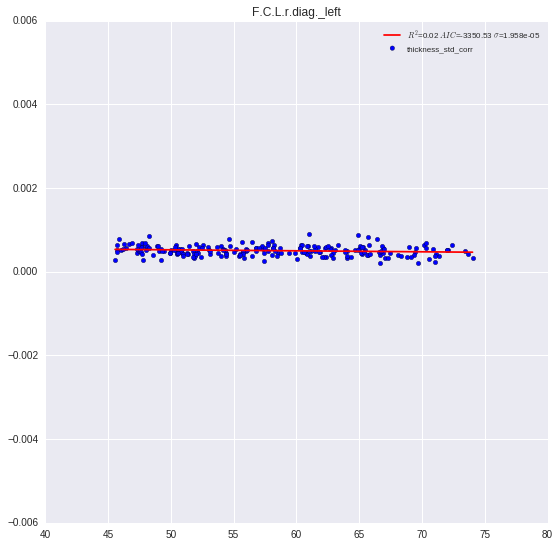

S.Pa.sup._left
[[ 1.         -0.04923562]
 [-0.04923562  1.        ]]


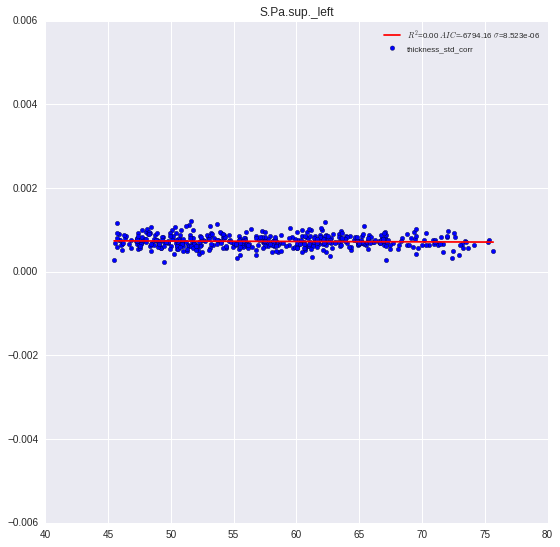

S.Rh._left
[[ 1.         -0.18734204]
 [-0.18734204  1.        ]]


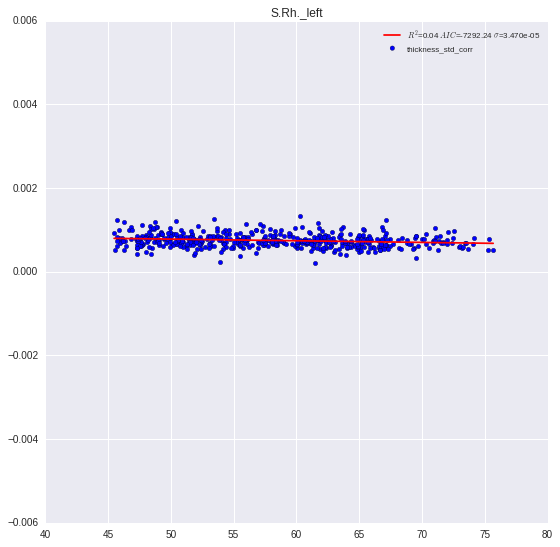

F.C.L.r.sc.post._left
[[ 1.         -0.17733169]
 [-0.17733169  1.        ]]


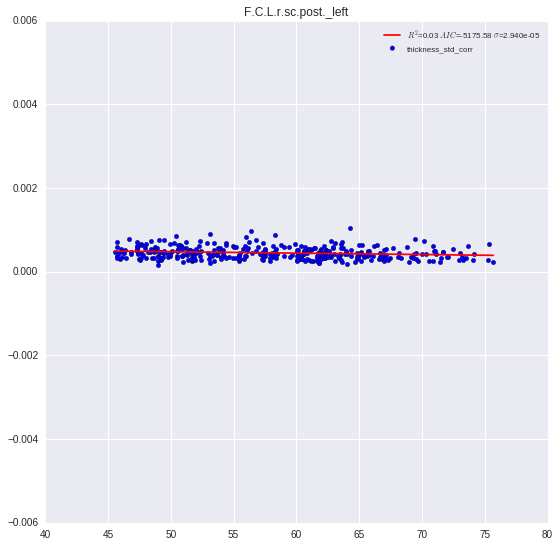

S.Pe.C.inf._left
[[ 1.         -0.10286602]
 [-0.10286602  1.        ]]


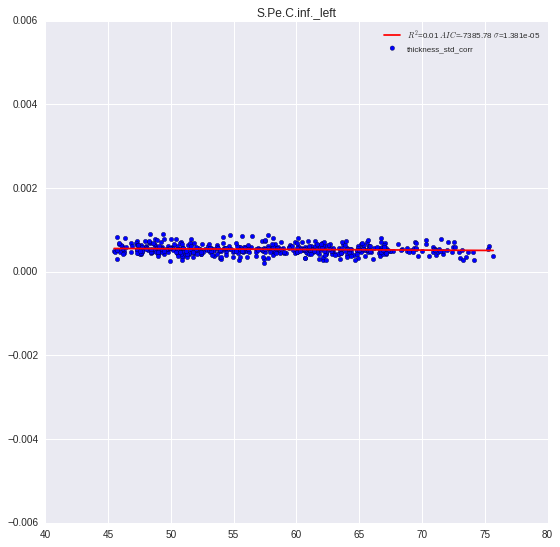

S.GSM._left
[[ 1.         -0.11204224]
 [-0.11204224  1.        ]]


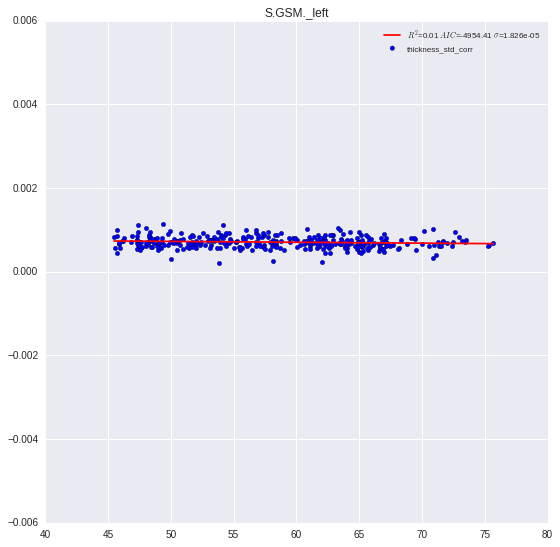

F.C.L.p._left
[[ 1.         -0.11859338]
 [-0.11859338  1.        ]]


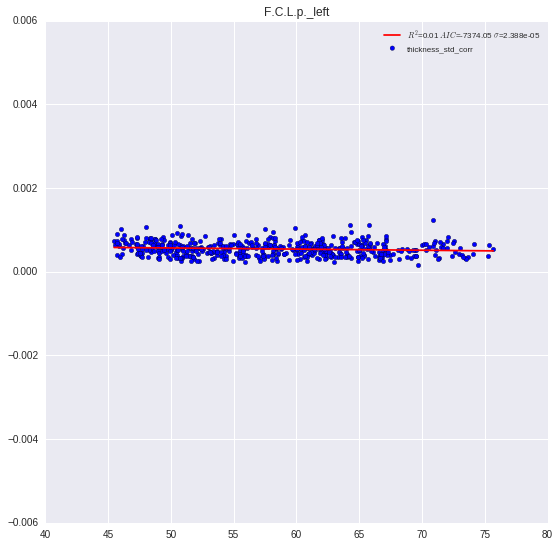

S.F.marginal._left
[[ 1.         -0.06805168]
 [-0.06805168  1.        ]]


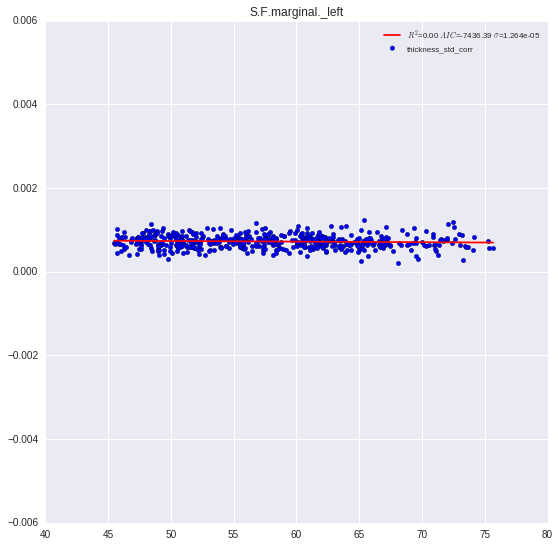

S.T.pol._left
[[ 1.         -0.09389321]
 [-0.09389321  1.        ]]


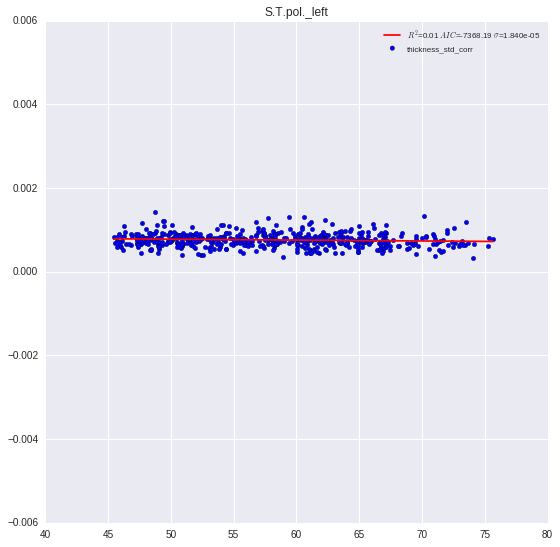

F.P.O._left
[[ 1.         -0.07453898]
 [-0.07453898  1.        ]]


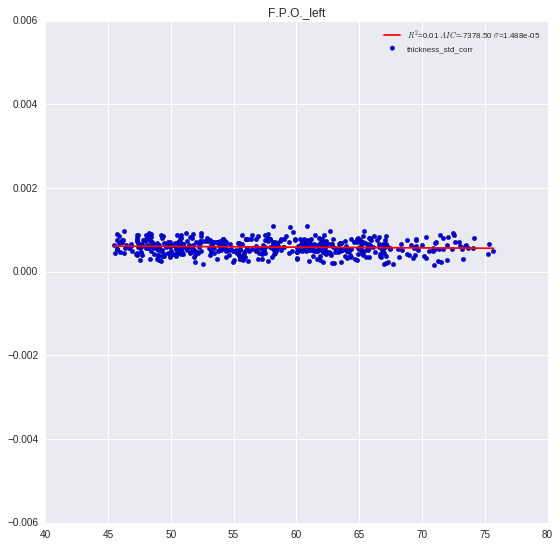

S.Pa.int._left
[[ 1.         -0.16864457]
 [-0.16864457  1.        ]]


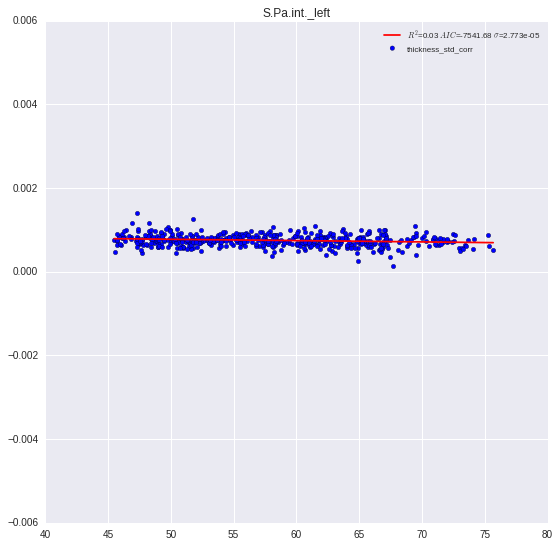

F.Coll._left
[[ 1.         -0.14373506]
 [-0.14373506  1.        ]]


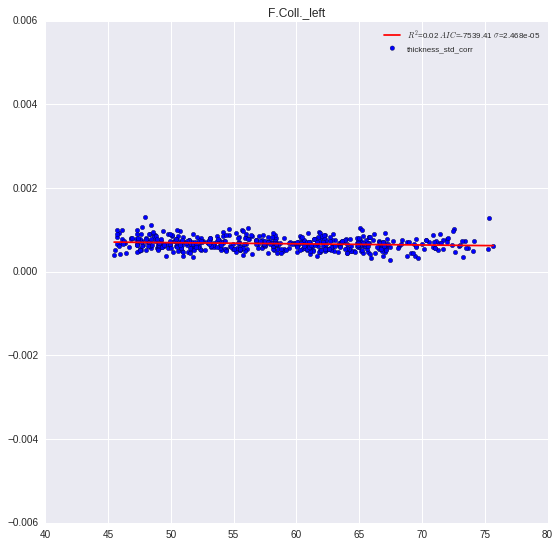

S.Pa.t._left
[[ 1.        -0.0704012]
 [-0.0704012  1.       ]]


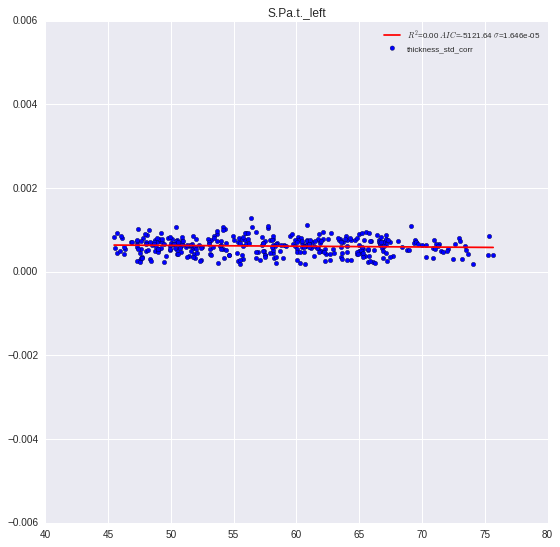

S.O.T.lat.ant._left
[[ 1.         -0.13264504]
 [-0.13264504  1.        ]]


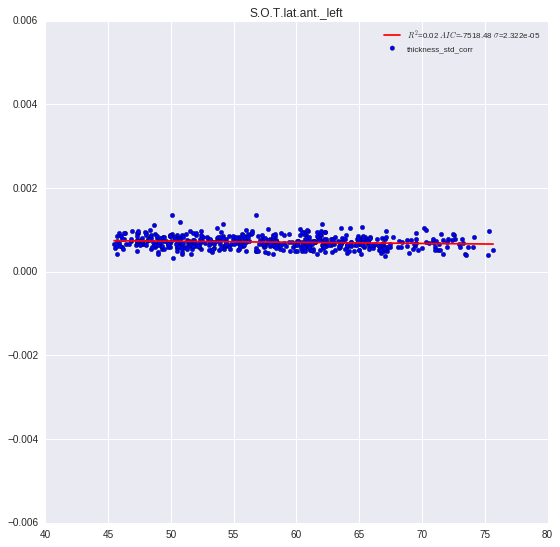

S.F.polaire.tr._left
[[ 1.          0.01491587]
 [ 0.01491587  1.        ]]


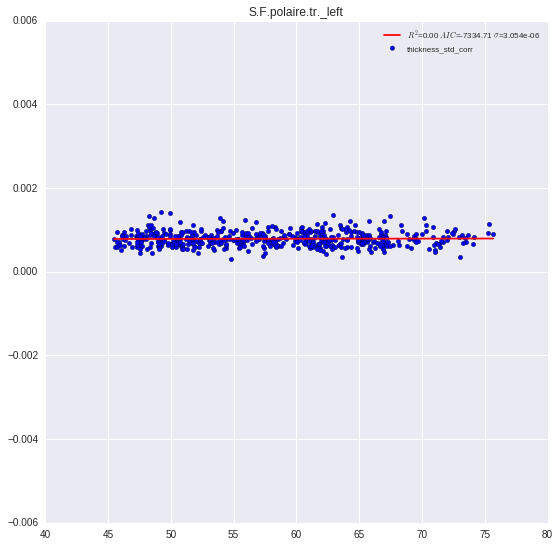

F.I.P._left
[[ 1.         -0.10344115]
 [-0.10344115  1.        ]]


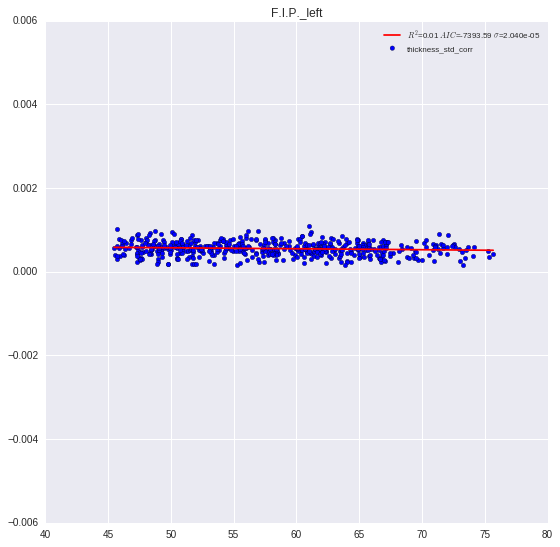

S.R.inf._left
[[ 1.         -0.06775652]
 [-0.06775652  1.        ]]


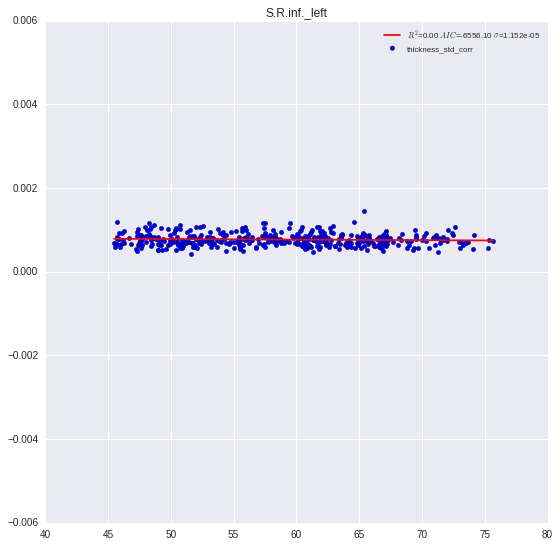

S.T.s._left
[[ 1.         -0.08601527]
 [-0.08601527  1.        ]]


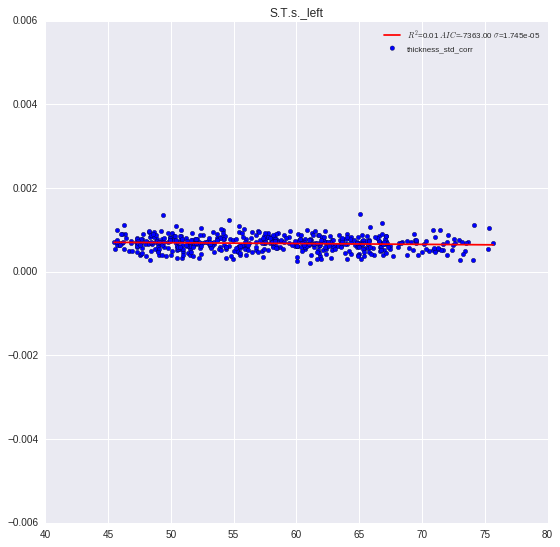

INSULA_left
[[ 1.         -0.12913152]
 [-0.12913152  1.        ]]


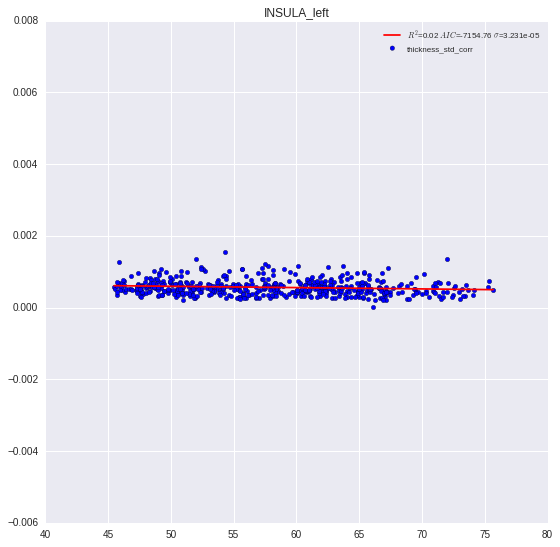

F.C.M.ant._left
[[ 1.         -0.13068465]
 [-0.13068465  1.        ]]


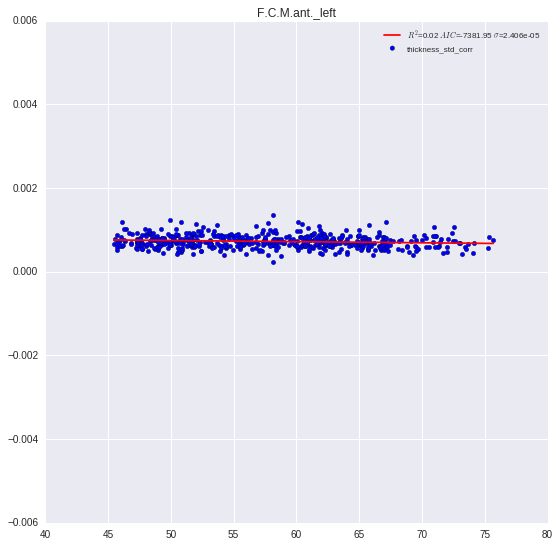

S.Or._left
[[ 1.         -0.00116732]
 [-0.00116732  1.        ]]


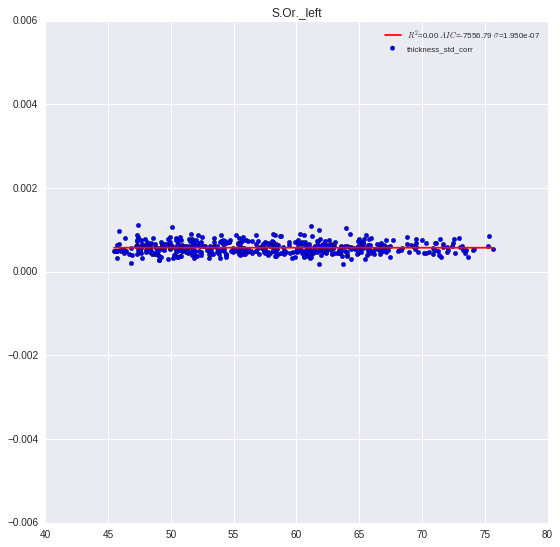

S.F.orbitaire._left
[[ 1.         -0.07422235]
 [-0.07422235  1.        ]]


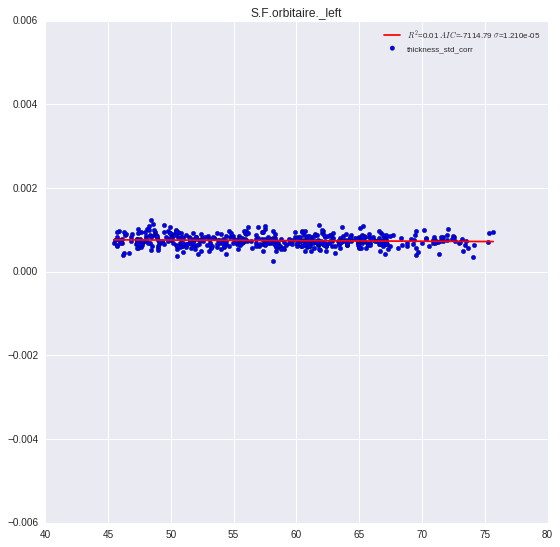

S.T.s.ter.asc.ant._left
[[ 1.         -0.13045177]
 [-0.13045177  1.        ]]


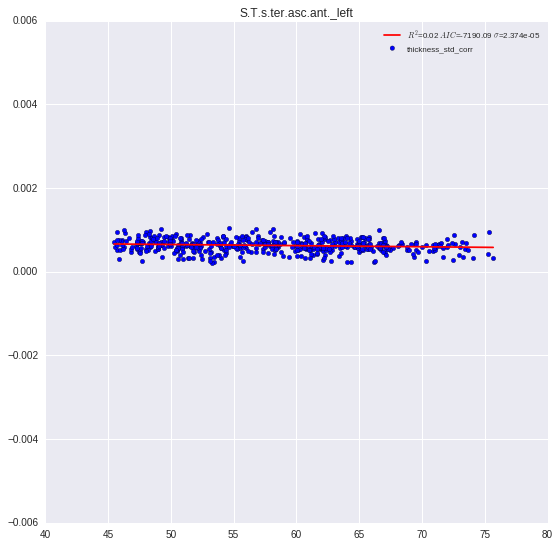

F.Cal.ant.-Sc.Cal._left
[[ 1.         -0.09536619]
 [-0.09536619  1.        ]]


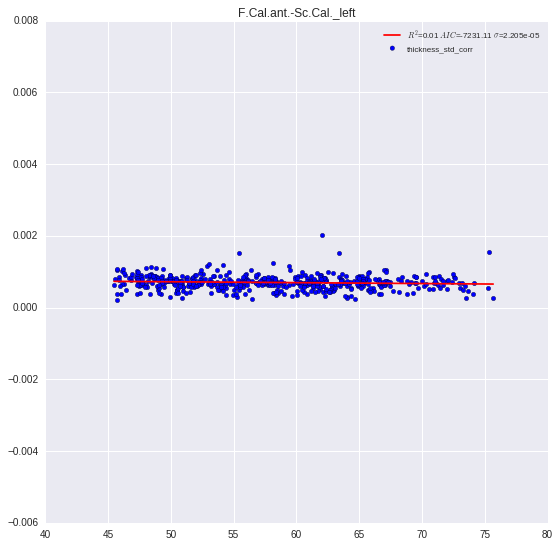

S.C.LPC._left
[[ 1.         -0.07394247]
 [-0.07394247  1.        ]]


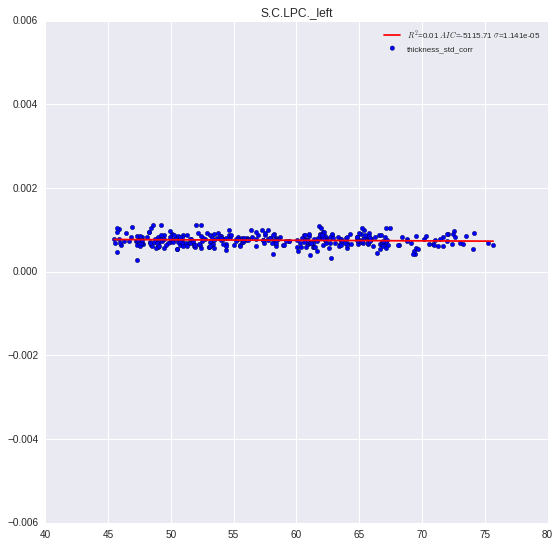

S.Li.ant._left
[[ 1.         -0.07398697]
 [-0.07398697  1.        ]]


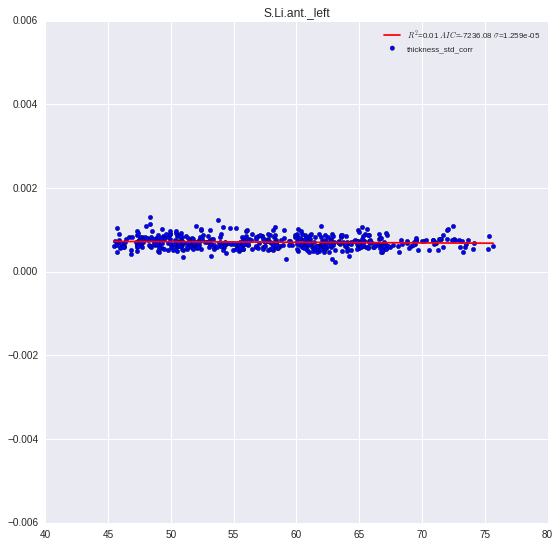

F.I.P.r.int.1_left
[[ 1.         -0.04453199]
 [-0.04453199  1.        ]]


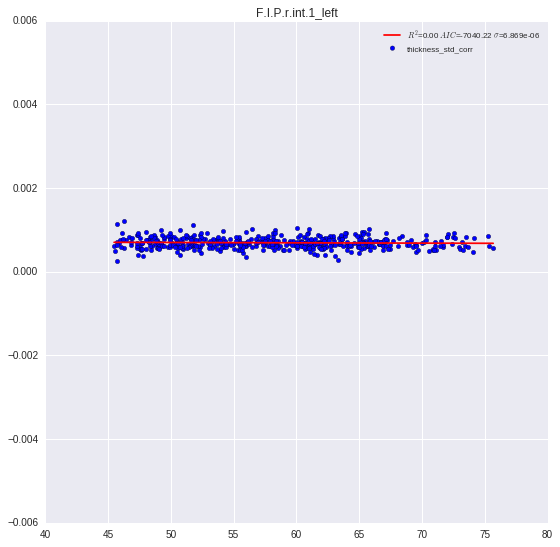

S.F.inf.ant._left
[[ 1.      -0.12136]
 [-0.12136  1.     ]]


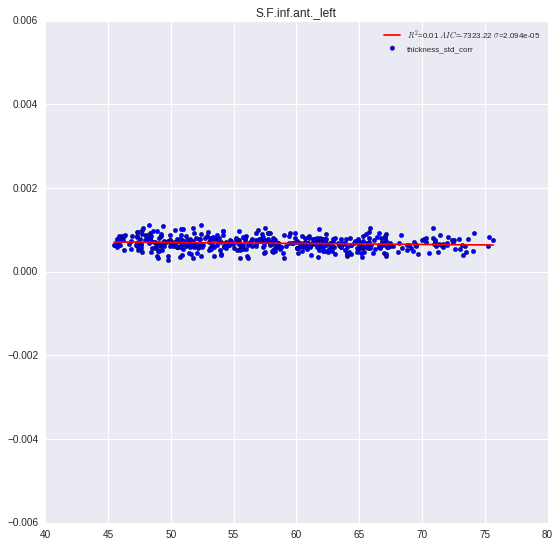

S.F.int._left
[[ 1.         -0.06907381]
 [-0.06907381  1.        ]]


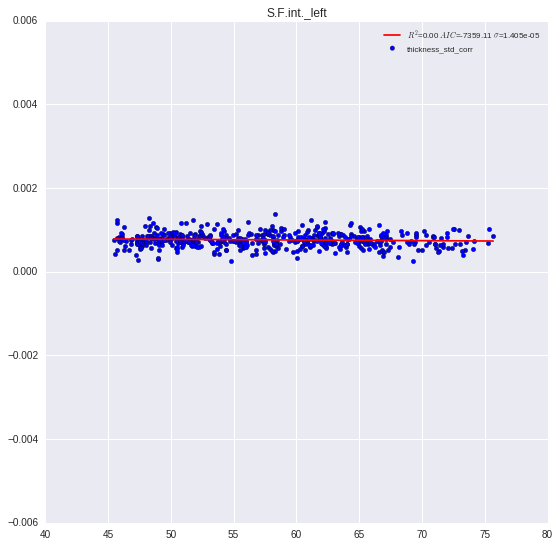

S.O.p._left
[[ 1.         -0.06933623]
 [-0.06933623  1.        ]]


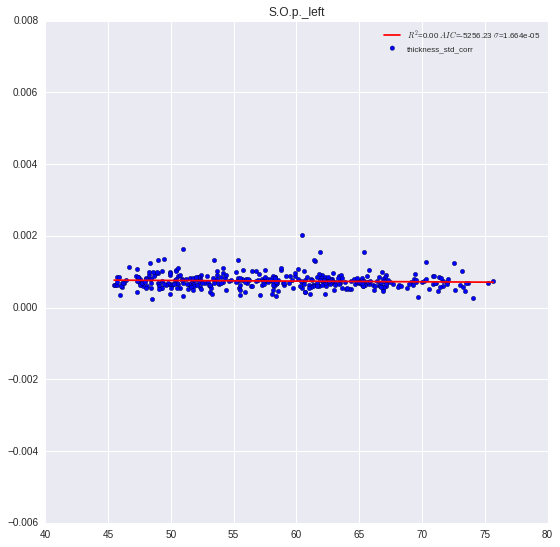

S.F.sup._left
[[ 1.          0.00400051]
 [ 0.00400051  1.        ]]


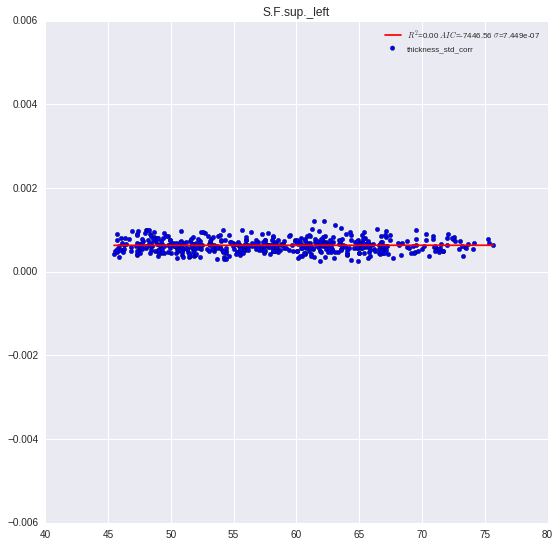

F.C.L.r.asc._left
[[ 1.         -0.02647946]
 [-0.02647946  1.        ]]


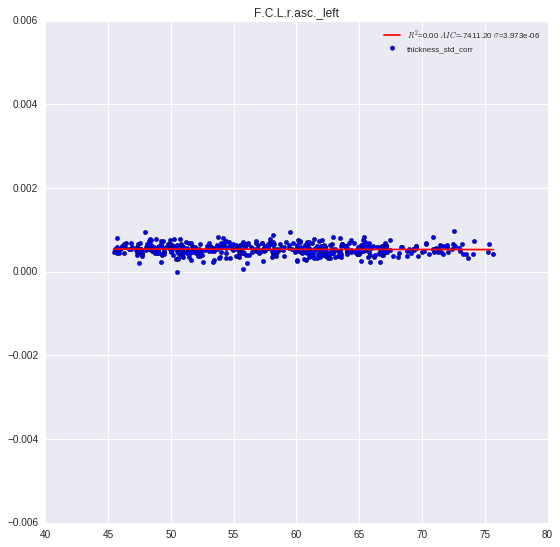

F.I.P.Po.C.inf._left
[[ 1.         -0.06142139]
 [-0.06142139  1.        ]]


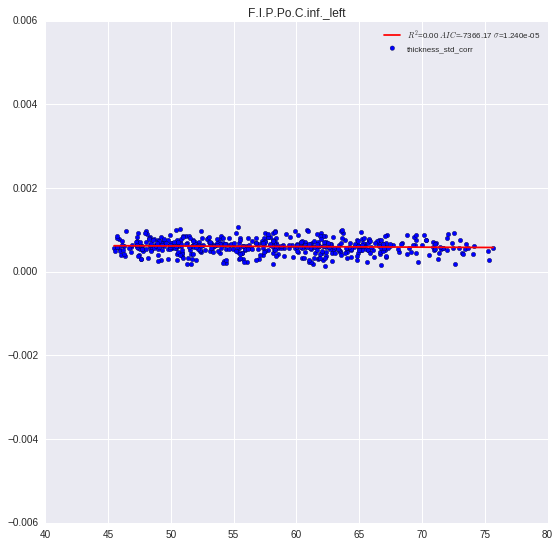

S.F.median._left
[[ 1.         -0.03549811]
 [-0.03549811  1.        ]]


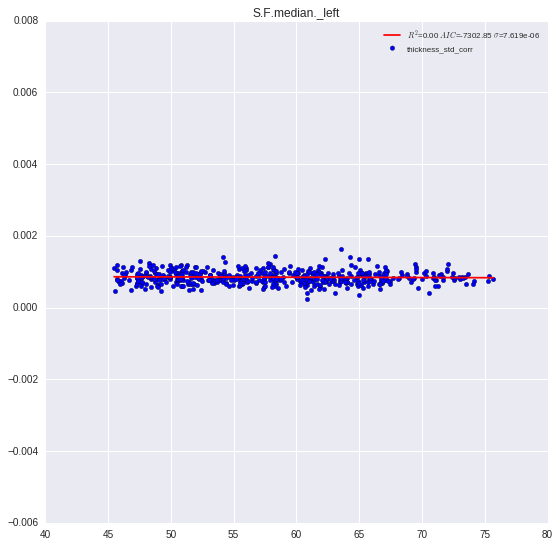

S.T.s.ter.asc.post._left
[[ 1.         -0.11823729]
 [-0.11823729  1.        ]]


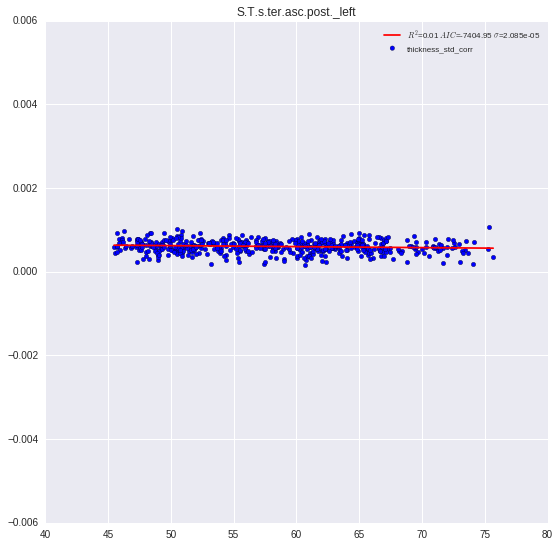

S.O.T.lat.int._left
[[ 1.         -0.05186278]
 [-0.05186278  1.        ]]


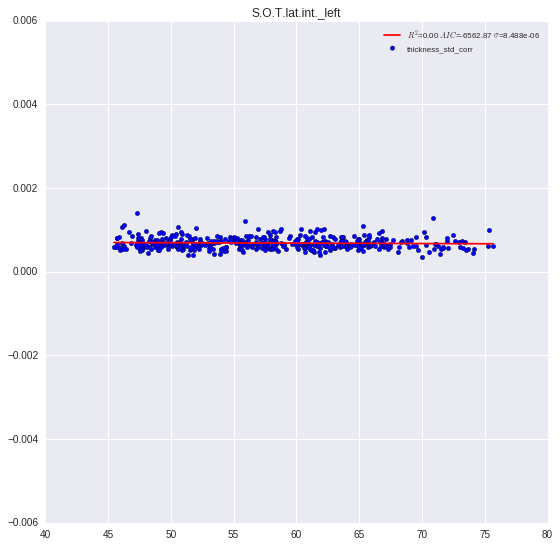

S.Pe.C.sup._left
[[ 1.         -0.01074172]
 [-0.01074172  1.        ]]


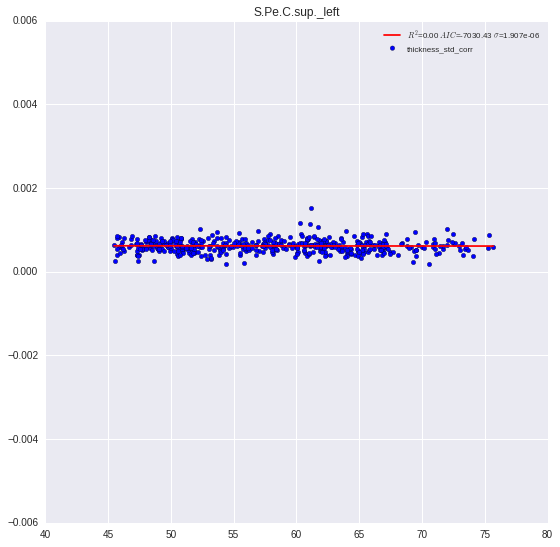

S.Po.C.sup._left
[[ 1.          0.03196483]
 [ 0.03196483  1.        ]]


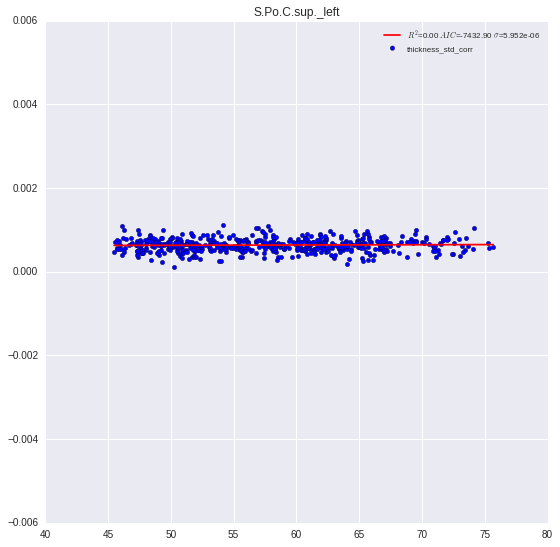

F.I.P.r.int.2_left
[[ 1.         -0.11320356]
 [-0.11320356  1.        ]]


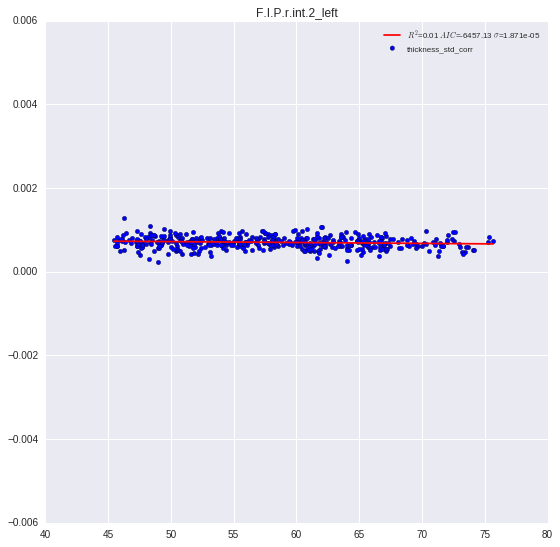

F.C.M.post._left
[[ 1.         -0.14613705]
 [-0.14613705  1.        ]]


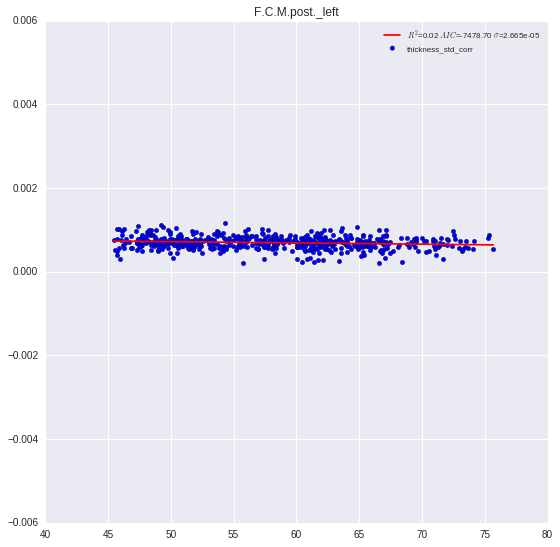

S.O.T.lat.post._left
[[  1.00000000e+00  -7.16315442e-04]
 [ -7.16315442e-04   1.00000000e+00]]


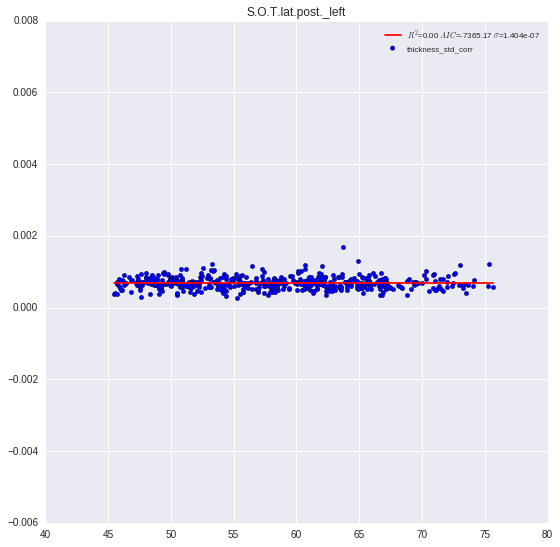

S.Cu._left
[[ 1.         -0.03573611]
 [-0.03573611  1.        ]]


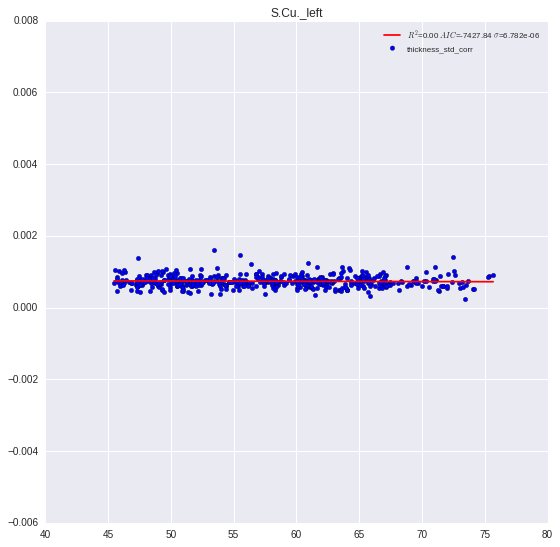

S.p.C._left
[[ 1.         -0.06657438]
 [-0.06657438  1.        ]]


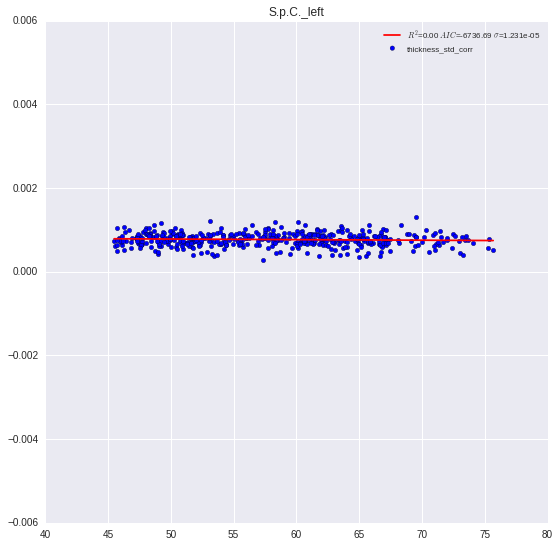

S.Pe.C.median._left
[[ 1.          0.00411246]
 [ 0.00411246  1.        ]]


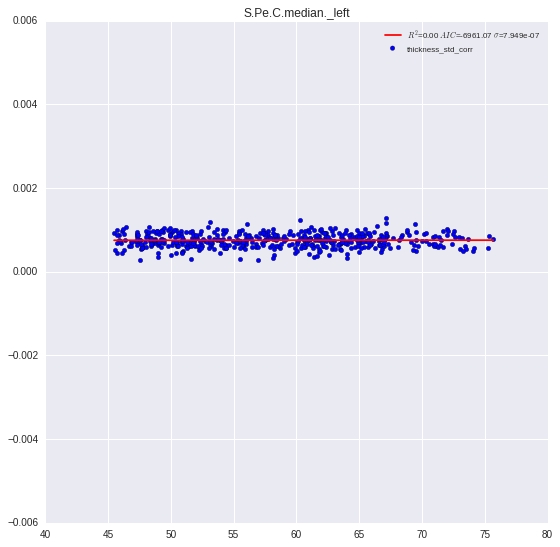

S.C._left
[[ 1.         -0.08844022]
 [-0.08844022  1.        ]]


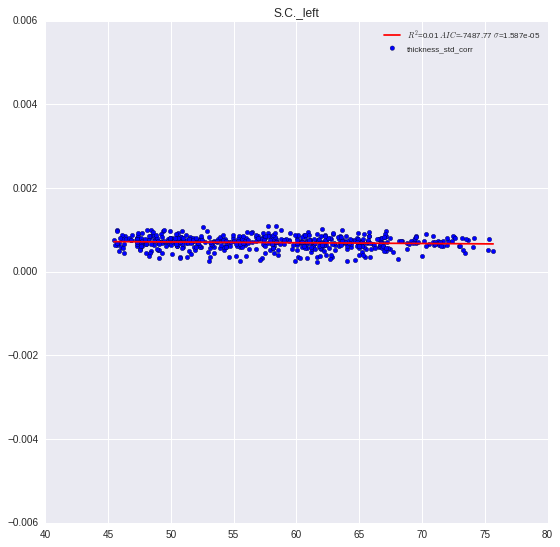

S.Pe.C.marginal._left
[[ 1.         -0.02977298]
 [-0.02977298  1.        ]]


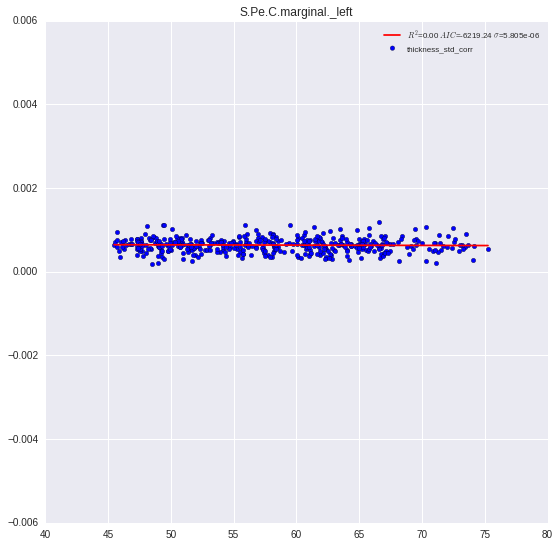

In [65]:
for label in labels:
    #label = labels[0]
    fig = plt.figure(figsize=(9,9), facecolor='white')

    ax = fig.add_subplot(111)

    print label
    df = data[data['label']==label]

    ax.scatter(df['age'], df['%s_corr'%key])
    # Fits a line on the group data
    x = pd.DataFrame({'age': np.linspace(df['age'].min(), df['age'].max(), 100)})
    poly = ols(formula='%s_corr~1+age'%key, data=df).fit()
    ypred = poly.predict(x)

    # Draws the fitted line
    ax.plot(x['age'], ypred, color='r', linestyle='-',
            label='$R^2$=%.2f $AIC$=%.2f $\sigma$=%.3e'
             % (poly.rsquared, poly.aic, np.std(ypred)),
            alpha=1.0)
    ax.legend(prop={'size':8})
    print np.corrcoef(df['age'], df['%s_corr'%key])
    ax.set_title(str(label))
    #ax.text(0.15, 0.95, label, horizontalalignment='center',
    #    verticalalignment='center', transform = ax.transAxes
    #    )
    
    plt.show()
